# 1.Decision Tree
A Decision Tree is a powerful supervised learning algorithm used for both classification and regression tasks. Think of it like a flowchart that helps you make a choice by asking a series of questions. It recursively splits the data into smaller and smaller subsets based on specific features until it reaches a final decision.

[Is age > 30?]

### 1.1 Root Node:
The Root Node is the very first node at the top of the tree. It represents the entire dataset and the first feature used to split the data. This feature is chosen because it provides the best split (highest information gain).

      ★ [Root Node]
         |
    (Best Split)

### 1.2 Decision Node (Internal Node):
A Decision Node is a sub-node that splits into further sub-nodes. These nodes represent a "test" or a question on a specific attribute.

    [Is temperature > 30°C?]
           /        \
      [Humidity?]  [Wind?]

### 1.3 Leaf Node (Terminal Node):
A Leaf Node is the end of a branch. These nodes do not split further and represent the final outcome or prediction.

    [Will buy]    [Will not buy]
         ↑               ↑
     Leaf Node      Leaf Node

### 1.4 Splitting:
The process of dividing a node into two or more sub-nodes. This is done to increase the purity of the resulting groups (making them more homogeneous).We can stop splitting if-
1.Leaf nodes are sufficiently pure
2.Other stopping criteria are met(max depth)

### 1.5 Pruning
The opposite of splitting. It involves removing branches that provide little power to classify instances. This helps prevent Overfitting (where the model memorizes training data but fails on new data).

Overfitting tree:Memorizes exceptions.Overfitting is when a model learns the training data too well, including noise, so it performs badly on new unseen data.It means the model memorizes instead of understanding.

Pruned tree:Focuses on majority trend.Pruning removes branches that:

-->Only explain very few samples

-->Do not improve validation performance

-->Represent random fluctuation

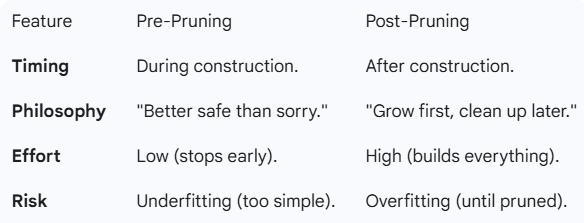

### 1.6 Mathematical Foundations
**Entropy:**

Entropy measures the randomness or disorder in the data. The goal of splitting is to reduce entropy.

Intuition:Higher entropy = more disorder = more impure node
E(S)=-​∑ pi*log (pi) 

Where:

pi = proportion of samples belonging to class i

Example (Binary Classification):

Pure Node: [10 Yes, 0 No]

E(S) = -(1.0 * log₂(1.0) + 0) = 0.0 ✓ (Perfect)

Impure Node: [5 Yes, 5 No]

E(S) = -(0.5 * log₂(0.5) + 0.5 * log₂(0.5)) = 1.0

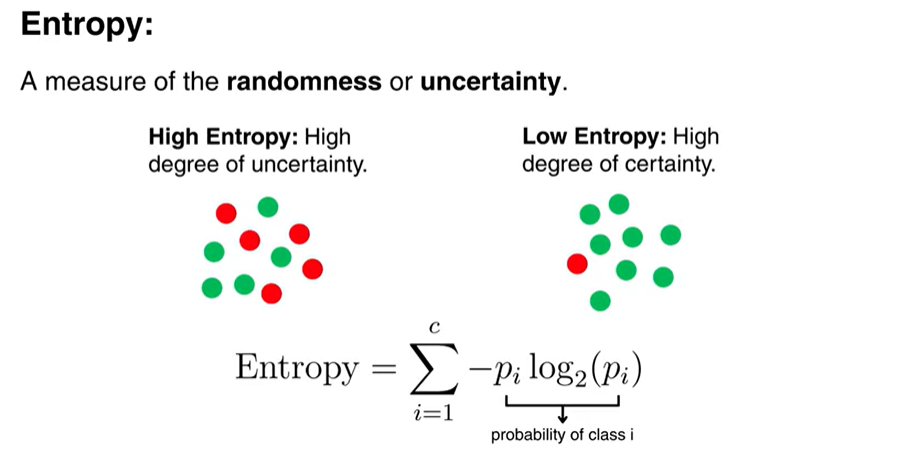

**Information Gain:**

Information Gain measures the reduction in entropy after splitting on an attribute. The tree chooses the attribute with the highest Information Gain.

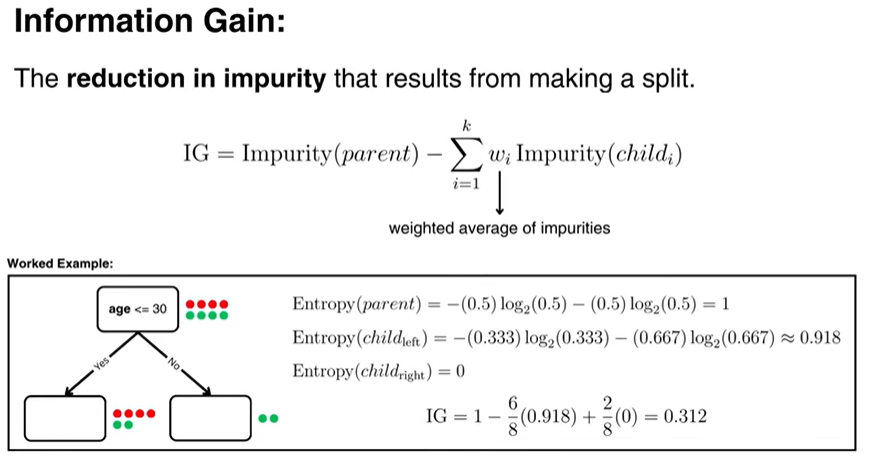

**Gini Impurity:**

Gini Impurity is used by the CART (Classification and Regression Tree) algorithm.It measures how mixed the classes are in a node, and decision trees choose splits that reduce Gini.The probability of misclassification is gini impurity.

Gini = 1- ∑(pi)^2

​pi= probability of class i in that node
 
Pure Node: [10 Yes, 0 No]
Gini = 1 - (1.0² + 0²) = 0.0(pure-low probability of misclassification) 

Even Split: [5 Yes, 5 No]
Gini = 1 - (0.5² + 0.5²) = 0.5(There is high chance of being wrong)


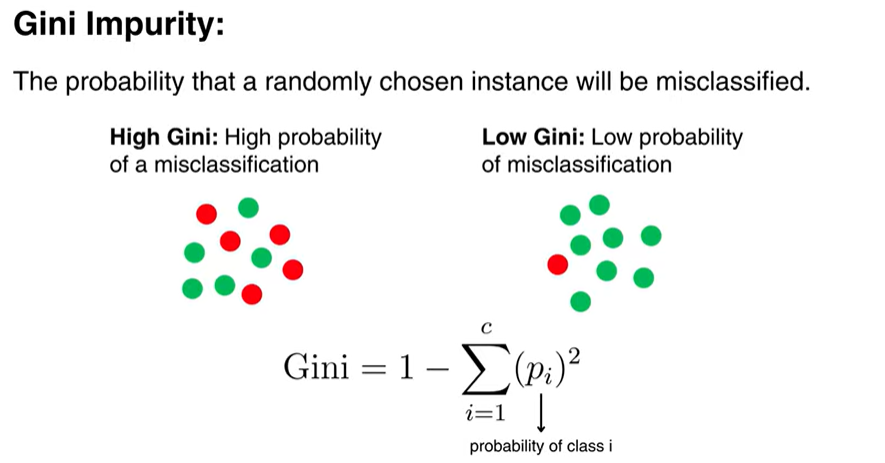


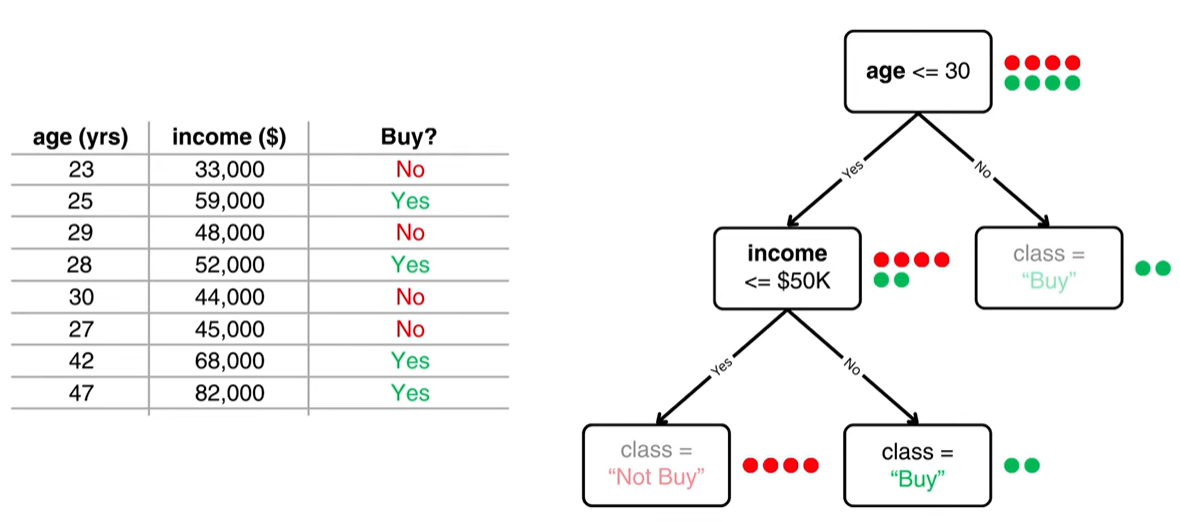



### Code:Basic of decision tree model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
import seaborn as sns
df=sns.load_dataset('iris')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#independent feutured and dependent features
x=df.iloc[:,:-1]        # .iloc → selects by position (integer index)     
                        # .loc → selects by label (row/column name)
y=iris.target
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42) #train_test_split randomly divides data into: Training data → learning and Test data → evaluation
x_train

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [27]:
from sklearn.tree import DecisionTreeClassifier  #This imports the Decision Tree classification model from sklearn
treemodel=DecisionTreeClassifier(max_depth=2)    #Create the model,No training yet,Just defining the algorithm    By default:criterion = "gini"(criterion="gini" means the decision tree uses Gini impurity to measure how good a split is and tries to minimize class mixing.)  max_depth = None (tree can grow fully → risk of overfitting)
treemodel.fit(x_train,y_train)   #Tries all possible splits and finds the best one based on the criterion (gini or entropy) and max_depth (if specified).Look at this training data and automatically create decision rules to predict the target variable based on the features. It builds a tree structure where each node represents a feature and each branch represents a decision rule. The model learns from the training data to make predictions on unseen data.


DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

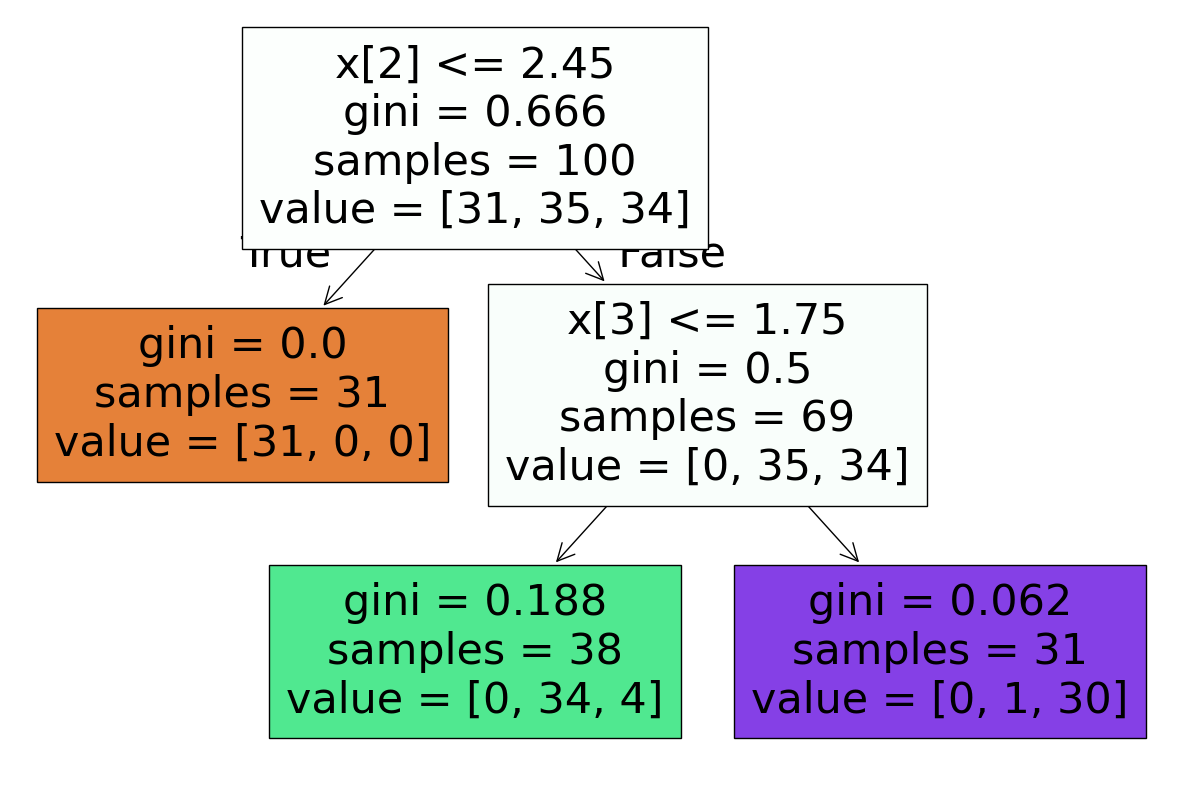

In [28]:
#constructing tree
from sklearn import tree              #imports the tree module from sklearn.Because plot_tree()function is inside this module.
plt.figure(figsize=(15,10))           #This creates a blank figure (canvas) for drawing.  15 → width  10 → height
tree.plot_tree(treemodel,filled=True) #This draws the trained decision tree.filled=True

#This colors the nodes.  One color = one class  Darker color = more pure  Lighter color = more mixed

In [30]:
#prediction
y_pred=treemodel.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [ ]:
#accuracy check
from sklearn.metrics import accuracy_score,classification_report      #accuracy_score → gives overall accuracy   classification_report → gives detailed performance (precision, recall, f1-score)
score=accuracy_score(y_test,y_predict)             #Accuracy=Correct Predictions / Total Predictions
print(score)
print(classification_report(y_pred,y_test))        #Precision: Out of predicted positive cases,how many are correct.
                                                   #Recall:Out of actual positive cases, how many did we correctly detect.   F1 score measures the balance between precision and recall

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

